In [2]:
import numpy as np 
PATH = 'results/release/semseg/test_final/'
semseg = np.load(f'{PATH}sample1.npz')['semseg']
semseg.shape

(208, 208, 80)

In [118]:
for i in range(208):
    for j in range(208):
        for k in range(80):
            if semseg[i, j, k] == -1:
                print(semseg[i, j, k])


[[1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 1]]


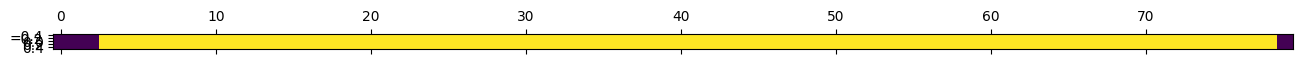

In [119]:
from matplotlib import pyplot as plt
import cv2
plt.matshow(semseg[0,0:1,:])
print(semseg[0,0:1,:])

In [7]:

tsdf = np.load(f'{PATH}sample1.npz')['tsdf']
tsdf.shape

(208, 208, 80)

In [7]:
x = np.arange(0,208)
y = np.arange(0,208)
z = np.arange(0,80)

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

print(X.shape)

#Filter classes here and plot them in 3D


(208, 208, 80)


In [3]:
import trimesh
from trimesh.exchange.ply import parse_header, ply_binary
PATH = 'results/release/semseg/test_final/sample1.ply'
with open(PATH, 'rb') as f:
    elements, is_ascii, image_name = parse_header(f)
    ply_binary(elements, f)
#vertex_labels = elements['vertex']['data']['semseg']
vertex= elements['vertex']['data']
#print(vertex[0][0])

coord_wall = []
coord_floor = []
z_f = []
z_w = []
obj_other = []
for v in vertex:
    if v[-1] == 1:
        x = v[0]
        y = v[1]
        z = v[2]
        z_w.append(v[2])
        coord_wall.append((x, y, z))
    elif v[-1] == 2:
        #print(v)
        x = v[0]
        y = v[1]
        z = v[2]
        z_f.append(v[2])
        coord_floor.append((x, y, z))
    elif v[-1] != 1:
        obj_other.append(v)
#print(obj_other)
print(elements)
# print(np.max(z_f), np.min(z_f))
# print(np.min(z_f))
# print(np.max(z_w))
# print(max(coord_floor))
# print(vertex)

OrderedDict([('vertex', {'length': 6, 'properties': OrderedDict([('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('red', '<u1'), ('green', '<u1'), ('blue', '<u1'), ('alpha', '<u1'), ('semseg', '<i4')]), 'data': array([(5.499998, 2.1599998, 2.12     , 31, 119, 180, 255, 3),
       (5.52    , 2.1599998, 2.1      , 31, 119, 180, 255, 3),
       (5.52    , 2.1399934, 2.12     , 31, 119, 180, 255, 3),
       (5.52    , 2.1599998, 2.1399999, 31, 119, 180, 255, 3),
       (5.52    , 2.18     , 2.12     , 31, 119, 180, 255, 3),
       (5.54    , 2.1599998, 2.12     , 31, 119, 180, 255, 3)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('red', 'u1'), ('green', 'u1'), ('blue', 'u1'), ('alpha', 'u1'), ('semseg', '<i4')])}), ('face', {'length': 8, 'properties': OrderedDict([('vertex_indices', '<u1, (3,)<i4')]), 'data': array([((3, [2, 1, 0]),), ((3, [0, 3, 2]),), ((3, [1, 4, 0]),),
       ((3, [0, 4, 3]),), ((3, [5, 1, 2]),), ((3, [3, 5, 2]),),
       ((3, [5, 4, 1]),), ((3, [4, 5, 3]),)],
   

In [121]:
PATH = 'results/release/semseg/test_final/'
origin = np.load(f'{PATH}sample1.npz')['origin']
print(origin)

[[ 0.   0.  -0.5]]


[ 1  2  3  4  5  6  7  8  9 10 11 15 16 17 19 21 22 23 25 27 29 38 39 40]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


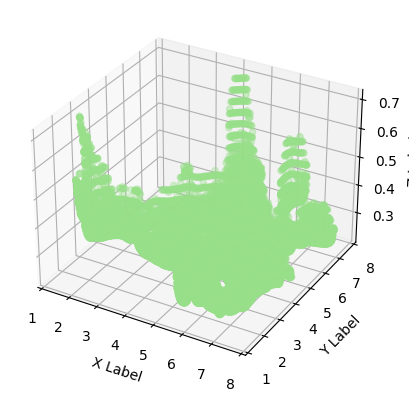

In [108]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = []
y = [] 
z = []
obj_labeled =dict()

def get_labeled_data(infile):
	with open(infile, 'rb') as f:
		elements, is_ascii, image_name = parse_header(f)
		ply_binary(elements, f)
		data= elements['vertex']['data']
		vertex_labels = elements['vertex']['data']['semseg']
		
	labels = np.unique(vertex_labels)
	print(labels)
	

	for label in labels:
		obj_labeled[label]= []
		for v in data:
			if v[-1] == label:
				
				obj_labeled[label].append(v)
       
	return obj_labeled #returns a dict with keys-labels and values - x, y, x , r, g , b



def get_pts(infile, label):
	obj_labeled = get_labeled_data(infile)
	for data in obj_labeled[label]:
		color = np.array([data[3], data[4], data[5]])
		x.append(data[0])
		y.append(data[1])
		z.append(data[2])

	return x, y, z, color


	
def plot_ply(infile):
	
	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')
	x,y,z, color = get_pts(infile, 2)
	#arr = [ el for el in elements if el[-1] == label  ]
	ax.scatter(x, y, z, c=color/255.0, marker='o')
	ax.set_xlabel('X Label')
	ax.set_xlim(1, 8)
	ax.set_ylim(1, 8)
	ax.set_ylabel('Y Label')
	ax.set_zlabel('Z Label')
	plt.show()	
	
if __name__ == '__main__':
	infile = PATH
	plot_ply(infile)